**Name:** Omitted

**Student ID:** Omitted

## Assignment 02, Question: 01

In [1]:
### Importing necessary libraries

## As usual libraries-

import numpy as np
import pandas as pd


## Data visualization libraries-

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Regression modelling libraries-

from sklearn import linear_model, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn import preprocessing   ## For Preprocessing


### 1. Classification 

**In this exercise, you have to work with a data of past and current employees of a company (’HR data.csv’).Your task is to build a classification model to predict which employee will leave the company and which will continue working (the target column is ’left’, where 1 indicates that the person left the company).**

You can find more details about the data from https://www.kaggle.com/mfaisalqureshi/hr-analytics-and-job-prediction

In [2]:
## Reading the given 'HR_data' csv file

df_hr = pd.read_csv('HR_data.csv', sep = ',', header = 0)
df_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


**• Try to understand the different variables using some basic statistical measures and some visualization tools. As the minimum, calculate mean values for numeric columns, value counts for categorical column, correlation of the columns, and a couple of scatter-plots and box-plots to understand the relationship between the outcome column ’left and other variables’.**

In [3]:
### Understanding the data, Data Prepearation and EDA

## Following we can have a look from multi dimentional angle to the dataset, 
# such as- numbers of data entries, null values (if any), datatypes.

df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
## Removing duplicate rows (if any) from the dataset

df_hr = df_hr.drop_duplicates(keep = 'first')
df_hr.shape

(11991, 10)

In [5]:
## Some descriptive statistics-

df_hr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.0,0.629658,0.241070,0.09,0.48,0.66,0.82,1.0
last_evaluation,11991.0,0.716683,0.168343,0.36,0.57,0.72,0.86,1.0
number_project,11991.0,3.802852,1.163238,2.00,3.00,4.00,5.00,7.0
average_montly_hours,11991.0,200.473522,48.727813,96.00,157.00,200.00,243.00,310.0
time_spend_company,11991.0,3.364857,1.330240,2.00,3.00,3.00,4.00,10.0
Work_accident,11991.0,0.154282,0.361234,0.00,0.00,0.00,0.00,1.0
left,11991.0,0.166041,0.372133,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,11991.0,0.016929,0.129012,0.00,0.00,0.00,0.00,1.0


In [6]:
df_hr.nunique() ## Checking unique values

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

In [7]:
### Calculating the minimum values for numeric columns-

hr_num = df_hr.select_dtypes('number') ## Considering only the numeric columns

hr_num.mean()  ## finding the mean

satisfaction_level         0.629658
last_evaluation            0.716683
number_project             3.802852
average_montly_hours     200.473522
time_spend_company         3.364857
Work_accident              0.154282
left                       0.166041
promotion_last_5years      0.016929
dtype: float64

In [8]:
### Value counts for categorical columns-

hr_cat = df_hr.select_dtypes(include = ['category', object]).columns   ## Finding the categorical columns

hr_cat

## Therefore, we will perform the value_count operation for Department and salary columns.

Index(['Department', 'salary'], dtype='object')

In [9]:
df_hr['Department'].value_counts()   ## Value_count for Department column

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: Department, dtype: int64

In [10]:
df_hr['salary'].value_counts()  ## ## Value_count for salary column

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [11]:
### Calculating correlation of the columns-

hr_corr = df_hr.corr()
hr_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


In [12]:
hr_corr.left.sort_values(ascending = False)  ## Sorting the values of 'left' variable

left                     1.000000
time_spend_company       0.173295
average_montly_hours     0.070409
number_project           0.030928
last_evaluation          0.013520
promotion_last_5years   -0.044657
Work_accident           -0.125436
satisfaction_level      -0.350558
Name: left, dtype: float64

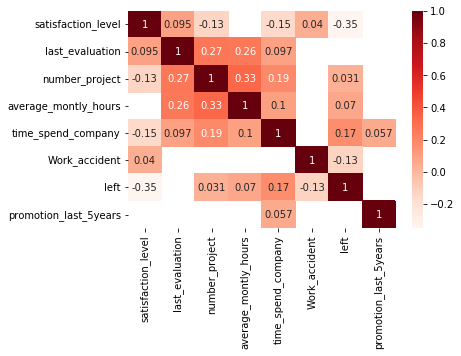

In [13]:
### Now we will see some vizualized form of data analysis

## Plotting correlation: As our target varaible is 'left', we will consider its correlation with other variables.

sns.heatmap(hr_corr[(hr_corr <= -0.05) | (hr_corr >= 0.03)], annot = True, cmap = 'Reds')

## We assume that, Correlation Coefficient values greater than (- 0.05) or less than (+ 0.03) are not that significant.

## In this heatmap filtering we can see that, one correlation is not visible for the variable in relation to our 
 # target variable.Therefore, we will exclude that variable for our classification models.

In [14]:
### Other relationship analysis: However, we will also display some other plots-

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


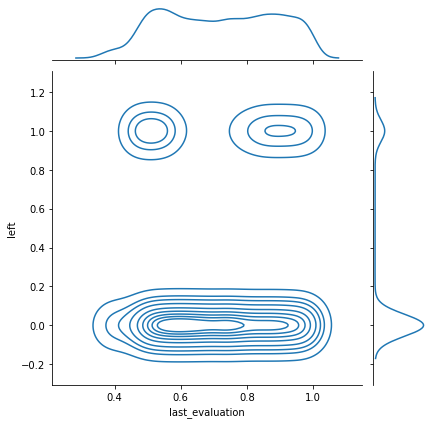

In [15]:
sns.jointplot('last_evaluation', 'left', data = df_hr, kind = 'kde')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


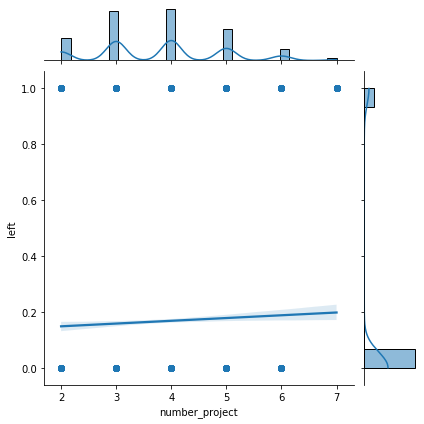

In [16]:
sns.jointplot('number_project', 'left', data = df_hr, kind = 'reg')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


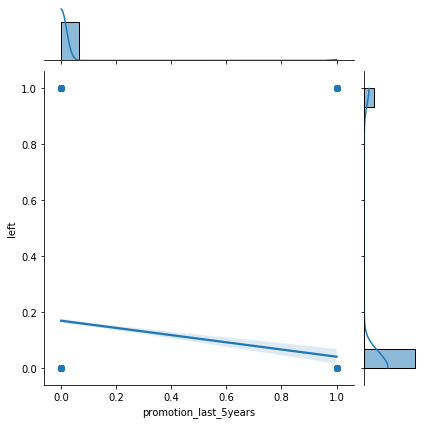

In [17]:
sns.jointplot('promotion_last_5years', 'left', data = df_hr, kind = 'reg')

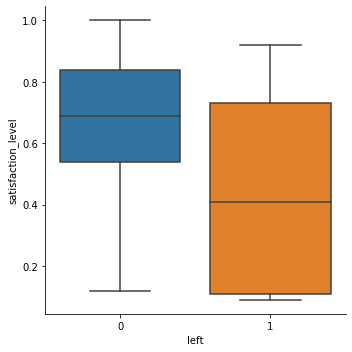

In [18]:
sns.catplot(x = 'left', y = 'satisfaction_level', data = df_hr, kind = 'box')

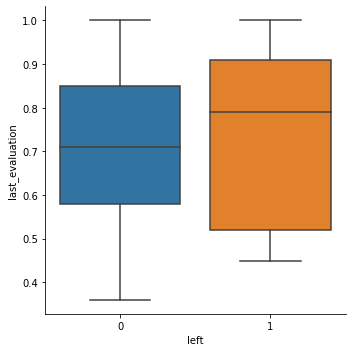

In [19]:
sns.catplot(x = 'left', y = 'last_evaluation' , data = df_hr, kind = 'box')

In [20]:
### Dropping variable that seems not significant-

hr = df_hr.drop(['last_evaluation'], axis = 1)
hr.tail()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
11995,0.90,3,259,10,1,0,1,management,high
11996,0.74,5,266,10,0,0,1,management,high
11997,0.85,3,185,10,0,0,1,management,high
11998,0.33,3,172,10,0,0,1,marketing,high
11999,0.50,4,180,3,0,0,0,IT,low


+ **Before creating classification models, transform all the categorical columns into numeric, and afterwards create traning and test sets** 

 (25% test set)

In [21]:
### Creating dummy variables for categorical columns including one-hot encoding-

hr_catlist = ['Department', 'salary']

for col in hr_catlist:
    hr_dum = pd.get_dummies(hr[col], drop_first = True, prefix = col)
    hr = pd.concat([hr, hr_dum], axis = 1).drop(col, axis = 1)

In [22]:
hr.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [23]:
### Creating trianing and test sets-

## Separate predictors and target variable 

hr_x = hr.drop(['left'], axis = 1) 
hr_y = hr['left']

## Data Split: Deviding the data into asked proportion: training (75 %) and test set (25 %) using 'random_state = 0' method

hr_x_train, hr_x_test, hr_y_train, hr_y_test = train_test_split(hr_x, hr_y, test_size = 0.25, random_state = 0)

In [24]:
## Checking the shape of splitted items

print(hr_x.shape, hr_y.shape)
print(hr_x_train.shape, hr_x_test.shape)
print(hr_y_train.shape, hr_y_test.shape)

(11991, 17) (11991,)
(8993, 17) (2998, 17)
(8993,) (2998,)


+ **Create a baseline model as a decision tree without any pruning (parameter specifications). What is
the accuracy you can achieve?**

In [25]:
### Now as a baseline model we will create a Decision tree without specifying any parameters-

## Importing the libraries-
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree  ## This we need to minimize our typing

## Initializing the decision tree with default parameters-
hr_tree = DecisionTreeClassifier(random_state = 0)

In [26]:
### Fitting the training data (training the model)-

hr_tree_model = hr_tree.fit(hr_x_train, hr_y_train)

In [27]:
### Applying the created model or making prediction-

## Once we trained our model, we can now create predictions for the test set
hr_pred_tree = hr_tree_model.predict(hr_x_test)
hr_pred_tree[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [28]:
### Now we will see what the result looks like compared to the original

print(hr_y_test[:5])
                       ## Here,'hr_y_test' is the actual value and 'hr_pred_tree' is the perdicted value.
    
print(pd.Series(hr_pred_tree[:5]).astype('int'))   ## To get the values in integar format, as by defalut it is an np array.

9136     0
4836     0
11041    0
9476     0
3728     0
Name: left, dtype: int64
0    1
1    1
2    0
3    0
4    0
dtype: int32


In [29]:
### Probability testing in our model- 

print(hr_tree.predict_proba(hr_x_test)[:5])
         ## This shows one calss vs other class: Probability of Quiting vs Probability of Not quiting the job in this case.

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [30]:
### Assessing the performance-

## And now we can create the classification report for the prediction and original test data outcomes

print(confusion_matrix(hr_y_test, hr_pred_tree))
print()
print(classification_report(hr_y_test, hr_pred_tree))

### We can see here that we get 96% accuracy.

[[2459   67]
 [  40  432]]

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2526
           1       0.87      0.92      0.89       472

    accuracy                           0.96      2998
   macro avg       0.92      0.94      0.93      2998
weighted avg       0.97      0.96      0.96      2998



In [31]:
## We can also calculate the accuracy rate of the prediction by our own

print('accuracy:','%.2f'% ((2459 + 432) / (2459 + 67 + 40 + 432)))   ## ('Total Correctly Classified / Total Classified')

accuracy: 0.96


In [32]:
### Vizualising the tree
## For this we need the following library-
import graphviz

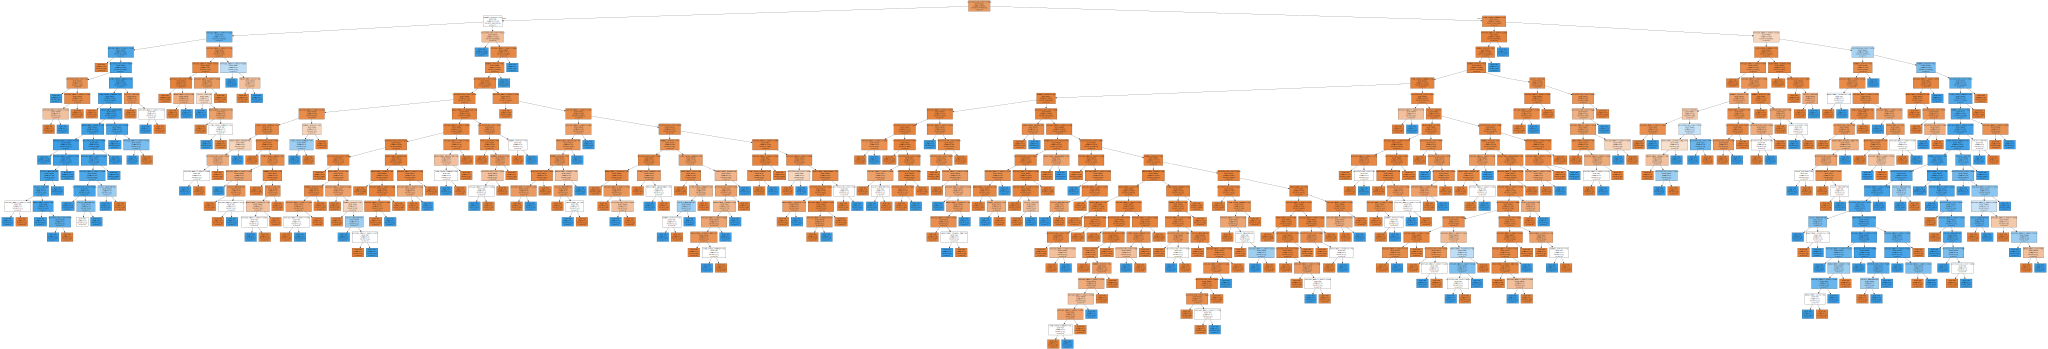

In [33]:
## First, we will convert the tree to the right format

hr_viz_tree = tree.export_graphviz(hr_tree, out_file = None, feature_names = hr_x.columns, class_names = ['0', '1'], filled =True)

hr_graph = graphviz.Source(hr_viz_tree)

## To save it as an external file-
## hr_graph.render('hr_viz_tree')##
hr_graph

+ **Create models by optimizing the parameters of (i) decision trees, (ii) bagging, and (iii) random forest
classifiers.** 
+ **What is the best accuracy you can achieve across all the models?**

In [34]:
### Creating models by optimizing the parameters-

## For this, first we will import some necessary libraries-

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [35]:
### Optimizing the Decision tree-
## We will use our previously defined decision tree placeholder'hr_tree'-

hr_criterion = ['gini', 'entropy']   ## Specifying possible values for criterion optimality

hr_max_depth = [2,4,6,8,10]    ## Maximum depth of the tree

hr_weights = ['balanced', {0:0.1, 1:0.9}]   ## Class weights

## Defining the grid, 20 possible models-
hr_grid = dict(criterion = hr_criterion, max_depth = hr_max_depth, class_weight = hr_weights)

## Specifying the grid search: using 'roc_auc' method to cpature different perspectives-
hr_grid_search = GridSearchCV(estimator = hr_tree, param_grid = hr_grid, scoring = 'roc_auc')

hr_grid_result = hr_grid_search.fit(hr_x, hr_y)   ## We use the whole dataset withouth any test-train splitting

print('The best result is', hr_grid_result.best_score_, 'using', hr_grid_result.best_params_)

The best result is 0.9712724153348195 using {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6}


In [36]:
### Now, we will try this best result-

hr_tree = DecisionTreeClassifier(max_depth = 6, criterion = 'entropy', class_weight = 'balanced', random_state = 0)
hr_tree_model = hr_tree.fit(hr_x, hr_y)
hr_pred_tree = hr_tree_model.predict(hr_x)

### Evaluating the result-
print(confusion_matrix(hr_y, hr_pred_tree))
print()
print(classification_report(hr_y, hr_pred_tree))

## We can see that we now have 98% accuracy.

[[9888  112]
 [ 148 1843]]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10000
           1       0.94      0.93      0.93      1991

    accuracy                           0.98     11991
   macro avg       0.96      0.96      0.96     11991
weighted avg       0.98      0.98      0.98     11991



In [37]:
### Using an ensemble method- 'bagging'-

## We have already imported the library previouly.

## First, We will define decision tree placeholder for the bagging-
            ## We will directly start with the parameters from our previously obtained best result
hr_bag = DecisionTreeClassifier(max_depth = 6, criterion = 'entropy', class_weight = 'balanced', random_state = 0)

## And now, we will create a bagging classifier object-
                 ## Here, n_estimators will make 300 different decision trees using different subsets of the training set.
bag_hr = BaggingClassifier(base_estimator = hr_bag, n_estimators = 300)   

## Fitting the training data
bag_hr.fit(hr_x_train, hr_y_train)


### Evaluating the result-

hr_pred_bag = bag_hr.predict(hr_x_test)

print(confusion_matrix(hr_y_test, hr_pred_bag))
print()
print(classification_report(hr_y_test, hr_pred_bag))

## We can see that here also we got 98% accuracy.

[[2491   35]
 [  33  439]]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2526
           1       0.93      0.93      0.93       472

    accuracy                           0.98      2998
   macro avg       0.96      0.96      0.96      2998
weighted avg       0.98      0.98      0.98      2998



In [38]:
### Using another ensemble method- 'RandomForest'-

## We have already imported the library previouly.

## We do not specify here the base estimator as by default RandomForest uses the decision tree as its base. 

## First, we will create a random forest classifier object-
                 ## We will use the parameters from our previously obtained best result
                 ## We will use 500 trees.
                 ## The number of features used in each node is the square root of the total number of columns
            
forest_hr = RandomForestClassifier(max_depth = 6, criterion = 'entropy', class_weight = 'balanced', n_estimators = 500, 
                                   random_state = 0)  

## Fitting the training data
forest_hr.fit(hr_x_train, hr_y_train)


### Evaluating the result-

hr_pred_forest = forest_hr.predict(hr_x_test)

print(confusion_matrix(hr_y_test, hr_pred_forest))
print()
print(classification_report(hr_y_test, hr_pred_forest))

## We can see that here we got 96% accuracy. 

[[2452   74]
 [  34  438]]

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2526
           1       0.86      0.93      0.89       472

    accuracy                           0.96      2998
   macro avg       0.92      0.95      0.93      2998
weighted avg       0.97      0.96      0.96      2998



In [39]:
### We will now try to optimize the RandomForest model even further-

hr_criterion = ['gini', 'entropy']   ## Specifying possible values for criterion optimality

hr_max_depth = [6,8,10,12,14]    ## Maximum depth of the tree

hr_weights = ['balanced', {0:0.1, 1:0.9}]  ## Class weights

## Defining the grid, 20 possible models-
hr_grid = dict(criterion = hr_criterion, max_depth = hr_max_depth, class_weight = hr_weights)

forest_hr = RandomForestClassifier(random_state = 0)  ## Creating RandomForest Placeholder

## Specifying the grid search: using 'roc_auc' method to cpature different perspectives-
hr_grid_search = GridSearchCV(estimator = forest_hr, param_grid = hr_grid, scoring = 'roc_auc')

hr_grid_result = hr_grid_search.fit(hr_x, hr_y)   ## We use the whole dataset withouth any test-train splitting

print('The best result is', hr_grid_result.best_score_, 'using', hr_grid_result.best_params_)

The best result is 0.9796985488218033 using {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10}


In [40]:
### Now, we will try this best result-

forest_hr = RandomForestClassifier(max_depth = 10, criterion = 'gini', class_weight = 'balanced', n_estimators = 500, 
                                   random_state = 0)

forest_hr.fit(hr_x_train, hr_y_train)  ## Fitting into the model


### Evaluating the result-

hr_pred_forest = forest_hr.predict(hr_x_test)

print(confusion_matrix(hr_y_test, hr_pred_forest))
print()
print(classification_report(hr_y_test, hr_pred_forest))

## We can see that here we improved our result and got 98% accuracy. And this seems the best one so far! 

[[2494   32]
 [  35  437]]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2526
           1       0.93      0.93      0.93       472

    accuracy                           0.98      2998
   macro avg       0.96      0.96      0.96      2998
weighted avg       0.98      0.98      0.98      2998



+ **What are the three most important predictors according to the best random forest model?**
+ **Create a new random forest model that uses only those three variables as predictors.**
+ **What is the best accuracy you can achieve using only the three variables?**

In [41]:
### Measuring the predictors according to the best random forest model-

measure_rf = pd.Series(data = forest_hr.feature_importances_, index =hr_x_train.columns)

measure_rf.sort_values(ascending = False) [:3]  ## Sorting the values and taking the most important 03 predictors

## Following three are the most important predictors

satisfaction_level    0.319335
time_spend_company    0.289134
number_project        0.182514
dtype: float64

In [42]:
### Now we will create a new RandomForest model using only those variables-

## Selecting the predicor variables, while our target variable will remain the same

hr_x = hr_x[['satisfaction_level', 'time_spend_company', 'number_project']] 
hr_x.head(3)

,satisfaction_level,time_spend_company,number_project
0,0.38,3,2
1,0.80,6,5
2,0.11,4,7


In [43]:
### Data Split: Deviding the data into asked proportion: training (75 %) and test set (25 %) using 'random_state = 0' method

hr_x_train, hr_x_test, hr_y_train, hr_y_test = train_test_split(hr_x, hr_y, test_size = 0.25, random_state = 0)

## Checking the shape of splitted items

print(hr_x.shape, hr_y.shape)
print(hr_x_train.shape, hr_x_test.shape)
print(hr_y_train.shape, hr_y_test.shape)

(11991, 3) (11991,)
(8993, 3) (2998, 3)
(8993,) (2998,)


In [44]:
### Now we will create a RandomForest Classifier object with some parameters. 
  # In this case, we have used the best possible parameters that we obtained previously

forest_hr = RandomForestClassifier(max_depth = 10, criterion = 'gini', class_weight = 'balanced', n_estimators = 500, 
                                   random_state = 0)

forest_hr.fit(hr_x_train, hr_y_train)  ## Fitting into the model


### Evaluating the result-

hr_pred_forest = forest_hr.predict(hr_x_test)

print(confusion_matrix(hr_y_test, hr_pred_forest))
print()
print(classification_report(hr_y_test, hr_pred_forest))

## We can see that here we got a bit worse accuracy (only 97%) 

[[2481   45]
 [  32  440]]

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2526
           1       0.91      0.93      0.92       472

    accuracy                           0.97      2998
   macro avg       0.95      0.96      0.95      2998
weighted avg       0.97      0.97      0.97      2998



In [45]:
### We will now try to optimize the RandomForest model even further-

hr_criterion = ['gini', 'entropy']   ## Specifying possible values for criterion optimality

hr_max_depth = [2,4,6,8,10,12,14]    ## Maximum depth of the tree

hr_weights = ['balanced', {0:0.1, 1:0.9}]  ## Class weights

## Defining the grid, 28 possible models-
hr_grid = dict(criterion = hr_criterion, max_depth = hr_max_depth, class_weight = hr_weights)

forest_hr = RandomForestClassifier(random_state = 0)  ## Creating RandomForest Placeholder

## Specifying the grid search: using 'roc_auc' method to cpature different perspectives-
hr_grid_search = GridSearchCV(estimator = forest_hr, param_grid = hr_grid, scoring = 'roc_auc')

hr_grid_result = hr_grid_search.fit(hr_x, hr_y)   ## We use the whole dataset withouth any test-train splitting

print('The best result is', hr_grid_result.best_score_, 'using', hr_grid_result.best_params_)

The best result is 0.9764588610344959 using {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8}


In [46]:
### Now, we will try this best result-

forest_hr = RandomForestClassifier(max_depth = 8, criterion = 'entropy', class_weight = 'balanced', n_estimators = 500, 
                                   random_state = 0)

forest_hr.fit(hr_x_train, hr_y_train)  ## Fitting into the model


### Evaluating the result-

hr_pred_forest = forest_hr.predict(hr_x_test)

print(confusion_matrix(hr_y_test, hr_pred_forest))
print()
print(classification_report(hr_y_test, hr_pred_forest))

## We can see that here we improved our result and got 98% accuracy. And this seems the best compared to all other model! 

[[2490   36]
 [  32  440]]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2526
           1       0.92      0.93      0.93       472

    accuracy                           0.98      2998
   macro avg       0.96      0.96      0.96      2998
weighted avg       0.98      0.98      0.98      2998

